In [67]:
"""
Required Packages: [
    "numpy(1.18.1)",
    "tensorflow(2.1.0)",
    "pandas(1.0.3)",
    "scikit-learn(0.22.2)",
    "PyKomoran(0.1.5)",
    "matplotlib(3.1.3)",
    "graphviz(0.14)",
    "pydot(1.4.1)"
]
"""

'\nRequired Packages: [\n    "numpy(1.18.1)",\n    "tensorflow(2.1.0)",\n    "pandas(1.0.3)",\n    "scikit-learn(0.22.2)",\n    "PyKomoran(0.1.5)",\n    "matplotlib(3.1.3)",\n    "graphviz(0.14)",\n    "pydot(1.4.1)"\n]\n'

In [68]:
SOT = 'sot'
EOT = 'eot'
PAD = 0

In [69]:
import pandas as pd

articles = pd.read_csv('articles.tsv', sep='\t')
print(articles)

                                title  \
0    제주항공 "열흘내에 선행조건 다 해결해라"…사실상 파기수순   
1      이 앱 열면…한국 10대들 개인정보 중국으로 줄줄 샌다   
2  “예수가 레즈비언?” 마이클 잭슨 딸 출연 영화 신성모독 논란   

                                                body  
0  제주항공이 이스타항공 측에 "10일 이내에 선결 조건을 모두 이행하지 않으면 계약을...  
1  지난해 5월 미국 코네티컷주 한 마을에 거주하고 있는 14살 소녀 찰리 다멜리오는 ...  
2  마이클 잭슨의 딸 패리스 잭슨(22)이 ‘예수 그리스도’로 출연한 영화가 ‘신성 모...  


In [70]:
def pre_processing(text: str) -> str:
    return SOT + ' ' + text + ' ' + EOT

articles['title'] = articles['title'].apply(pre_processing)
articles['body'] = articles['body'].apply(pre_processing)
print(articles)

                                        title  \
0    sot 제주항공 "열흘내에 선행조건 다 해결해라"…사실상 파기수순 eot   
1      sot 이 앱 열면…한국 10대들 개인정보 중국으로 줄줄 샌다 eot   
2  sot “예수가 레즈비언?” 마이클 잭슨 딸 출연 영화 신성모독 논란 eot   

                                                body  
0  sot 제주항공이 이스타항공 측에 "10일 이내에 선결 조건을 모두 이행하지 않으면...  
1  sot 지난해 5월 미국 코네티컷주 한 마을에 거주하고 있는 14살 소녀 찰리 다멜...  
2  sot 마이클 잭슨의 딸 패리스 잭슨(22)이 ‘예수 그리스도’로 출연한 영화가 ‘...  


In [71]:
from PyKomoran import Komoran
k = Komoran('EXP')

title_separated = [k.get_morphes_by_tags(title) for title in articles['title']]
print(title_separated[0][:20])

body_separated = [k.get_morphes_by_tags(body) for body in articles['body']]
print(body_separated[0][:20])

['sot', '제주항공', '"', '열흘', '내', '에', '선행', '조건', '다', '해결', '하', '아라', '"', '…', '사실', '상', '파기', '수순', 'eot']
['sot', '제주항공', '이', '이스타항공', '측', '에', '"', '10', '일', '이내', '에', '선결', '조건', '을', '모두', '이행', '하', '지', '않', '으면']


In [72]:
max_title_morphemes = max([len(title) for title in title_separated])
print(max_title_morphemes)

max_body_morphemes = max([len(body) for body in body_separated])
print(max_body_morphemes)

19
2002


In [73]:
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np

tokenizer = Tokenizer(filters='')
tokenizer.fit_on_texts(title_separated)
tokenizer.fit_on_texts(body_separated)
tokenizer.index_word[PAD] = PAD

num_of_morphemes = len(tokenizer.word_counts) + 1
print(num_of_morphemes)

title_sequence = tokenizer.texts_to_sequences(title_separated)
print(title_sequence)

body_sequence = tokenizer.texts_to_sequences(body_separated)
print(body_sequence)

974
[[69, 49, 33, 142, 83, 8, 339, 84, 4, 85, 1, 340, 33, 194, 104, 86, 195, 196, 70], [69, 2, 105, 341, 87, 194, 197, 198, 39, 342, 47, 16, 343, 344, 40, 70], [69, 88, 42, 13, 106, 199, 107, 143, 144, 71, 36, 345, 55, 70]]
[[69, 49, 2, 50, 346, 8, 33, 347, 64, 348, 8, 145, 84, 7, 200, 146, 1, 30, 72, 349, 147, 7, 350, 1, 201, 4, 33, 5, 351, 9, 89, 7, 108, 6, 37, 16, 202, 23, 24, 4, 3, 352, 203, 34, 204, 23, 6, 84, 2, 353, 354, 355, 2, 205, 6, 50, 2, 356, 56, 16, 357, 83, 8, 85, 1, 57, 358, 6, 206, 104, 86, 147, 195, 196, 7, 359, 65, 23, 38, 37, 16, 148, 40, 3, 109, 64, 360, 207, 8, 90, 87, 49, 10, 208, 361, 64, 50, 2, 108, 6, 145, 362, 146, 34, 204, 1, 6, 89, 8, 91, 18, 363, 364, 2, 73, 10, 365, 7, 108, 6, 37, 16, 92, 32, 30, 24, 4, 3, 50, 9, 89, 93, 7, 366, 7, 74, 18, 209, 1, 6, 367, 145, 84, 2, 104, 86, 85, 23, 30, 72, 19, 110, 368, 1, 17, 2, 14, 210, 1, 38, 149, 16, 142, 7, 111, 6, 211, 2, 4, 3, 21, 49, 2, 142, 83, 8, 50, 8, 85, 1, 94, 66, 369, 10, 370, 35, 371, 48, 372, 95, 150, 8

In [74]:
from typing import List

def padding(lst: List[int], max_len: int) -> List[int]:
    return lst + [PAD] * (max_len - len(lst))

title_sequence = [padding(title, max_title_morphemes) for title in title_sequence]
print(title_sequence[0][:20])

body_sequence = [padding(body, max_body_morphemes) for body in body_sequence]
print(body_sequence[0][:20])

[69, 49, 33, 142, 83, 8, 339, 84, 4, 85, 1, 340, 33, 194, 104, 86, 195, 196, 70]
[69, 49, 2, 50, 346, 8, 33, 347, 64, 348, 8, 145, 84, 7, 200, 146, 1, 30, 72, 349]


In [75]:
titles = np.array(title_sequence)
print(titles)

bodies = np.array(body_sequence)
print(bodies)

[[ 69  49  33 142  83   8 339  84   4  85   1 340  33 194 104  86 195 196
   70]
 [ 69   2 105 341  87 194 197 198  39 342  47  16 343 344  40  70   0   0
    0]
 [ 69  88  42  13 106 199 107 143 144  71  36 345  55  70   0   0   0   0
    0]]
[[ 69  49   2 ...   0   0   0]
 [ 69  75 119 ...   4   3  70]
 [ 69 143   9 ...   0   0   0]]


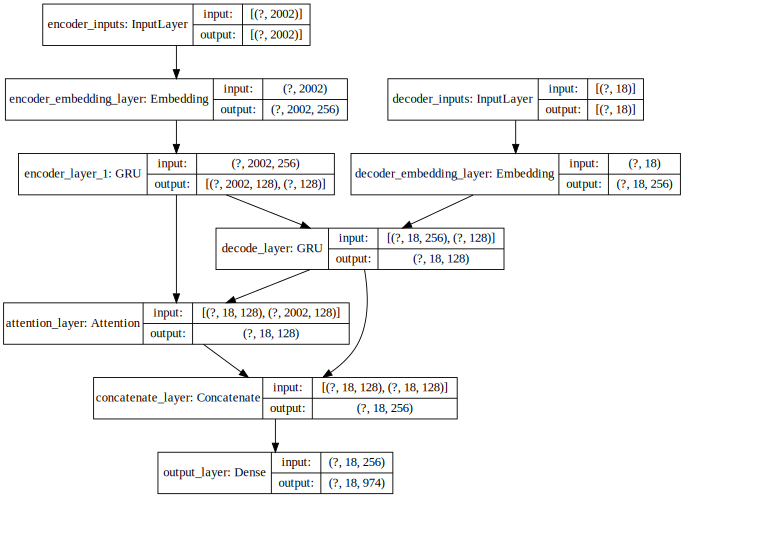

In [76]:
embedding_dim = 256
hidden_size = 128
encoder_layer_size = 1
learning_late = 0.001
dropout = 0.4

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, GRU, Attention, Concatenate, Dense
from tensorflow.keras.activations import softmax
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import sparse_categorical_crossentropy

# Encoder Input
encoder_inputs = Input(shape=(max_body_morphemes,), name='encoder_inputs')

# Encoder Embedding Layer
encoder_embedding = Embedding(
    num_of_morphemes, 
    embedding_dim, 
    name='encoder_embedding_layer'
)(encoder_inputs)

# Encoder Layer
encoder_outputs, encoder_states = None, None
for i in range(encoder_layer_size):
    encoder_layer = GRU(
        units=hidden_size,
        return_sequences=True, return_state=True,
        dropout=dropout, recurrent_dropout=dropout,
        name='encoder_layer_' + str(i + 1)
    )
    encoder_outputs, encoder_states = encoder_layer(
        encoder_embedding if encoder_outputs is None else encoder_outputs
    )

# Decoder
decoder_inputs = Input(shape=(max_title_morphemes - 1,), name='decoder_inputs')

# Decoder Embedding Layer
decoder_embedding_layer = Embedding(
    num_of_morphemes, 
    embedding_dim, 
    name='decoder_embedding_layer'
)
decoder_embedding = decoder_embedding_layer(decoder_inputs)

# Decoder Layer
decoder_layer = GRU(
    hidden_size,
    return_sequences=True,
    dropout=dropout, recurrent_dropout=dropout / 2,
    name='decode_layer'
)
decoder_outputs = decoder_layer(
    decoder_embedding,
    initial_state=encoder_states
)

# Attention Layer
attention_layer = Attention(name='attention_layer')
attention_outputs = attention_layer([decoder_outputs, encoder_outputs])

# Concatenate the Result of Attention and the Hidden States of Decoder
decoder_concat_inputs = Concatenate(axis=-1, name='concatenate_layer')(
    [decoder_outputs, attention_outputs]
)

# Output Layer
output_layer = Dense(num_of_morphemes, activation=softmax, name='output_layer')
outputs = output_layer(decoder_concat_inputs)

# Define Model
model = Model(
    inputs=[encoder_inputs, decoder_inputs], 
    outputs=outputs,
    name='training_model'
)

# Compile
model.compile(
    optimizer=Adam(learning_rate=learning_late),
    loss=sparse_categorical_crossentropy
)

# Display Model Summary
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot

# You need to install graphviz! (sudo apt install graphviz or brew install graphviz)
SVG(model_to_dot(model, show_shapes=True, dpi=65).create(prog='dot', format='svg'))

In [77]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    bodies, titles, test_size=0.33
)
print(x_train)
print(x_test)
print(y_train)
print(y_test)

[[ 69  49   2 ...   0   0   0]
 [ 69 143   9 ...   0   0   0]]
[[ 69  75 119 ...   4   3  70]]
[[ 69  49  33 142  83   8 339  84   4  85   1 340  33 194 104  86 195 196
   70]
 [ 69  88  42  13 106 199 107 143 144  71  36 345  55  70   0   0   0   0
    0]]
[[ 69   2 105 341  87 194 197 198  39 342  47  16 343 344  40  70   0   0
    0]]


In [78]:
epochs = 5
batch_size = 1

history = model.fit(
    [x_train, y_train[:, :-1]], y_train[:, 1:],
    epochs=epochs, batch_size=batch_size,
    validation_data=([x_test, y_test[:, :-1]], y_test[:, 1:])
)

Train on 2 samples, validate on 1 samples
Epoch 1/5
2/2 [==============================] - 9s 4s/sample - loss: 6.8785 - val_loss: 6.8729
Epoch 2/5
2/2 [==============================] - 4s 2s/sample - loss: 6.8424 - val_loss: 6.8655
Epoch 3/5
2/2 [==============================] - 4s 2s/sample - loss: 6.7997 - val_loss: 6.8569
Epoch 4/5
2/2 [==============================] - 4s 2s/sample - loss: 6.7559 - val_loss: 6.8458
Epoch 5/5
2/2 [==============================] - 4s 2s/sample - loss: 6.6549 - val_loss: 6.8318


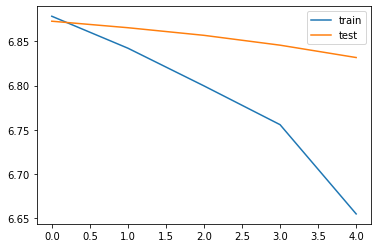

In [79]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

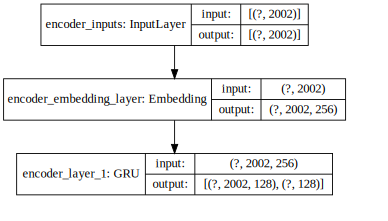

In [80]:
# Define Encoder Model
encoder_model = Model(
    inputs=encoder_inputs,
    outputs=[encoder_outputs, encoder_states],
    name='encoder_model'
)

# You need to install graphviz! (sudo apt install graphviz or brew install graphviz)
SVG(model_to_dot(encoder_model, show_shapes=True, dpi=65).create(prog='dot', format='svg'))

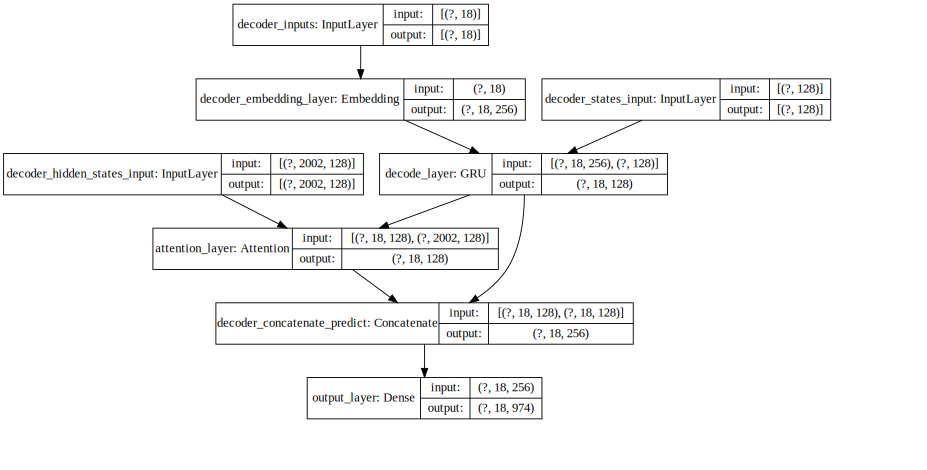

In [81]:
# Decoder
decoder_states_input = Input(
    shape=(hidden_size,),
    name='decoder_states_input'
)

decoder_embedding_predict = decoder_embedding_layer(decoder_inputs)
decoder_outputs_predict = decoder_layer(
    decoder_embedding_predict,
    initial_state=decoder_states_input
)

# Attention
decoder_hidden_states_input = Input(
    shape=(max_body_morphemes, hidden_size), 
    name='decoder_hidden_states_input'
)
attention_outputs_predict = attention_layer(
    [decoder_outputs_predict, decoder_hidden_states_input]
)
decoder_concat_predict = Concatenate(axis=-1, name='decoder_concatenate_predict')(
    [decoder_outputs_predict, attention_outputs_predict]
)

# Output Layer
outputs_predict = output_layer(decoder_concat_predict)

# Define Decoder Model
decoder_model = Model(
    [decoder_inputs, decoder_hidden_states_input, decoder_states_input],
    outputs_predict,
    name='decoder_model'
)

# You need to install graphviz! (sudo apt install graphviz or brew install graphviz)
SVG(model_to_dot(decoder_model, show_shapes=True, dpi=65).create(prog='dot', format='svg'))

In [85]:
from typing import Tuple, Union

def encoding(text: str) -> np.ndarray:
    separated = k.get_morphes_by_tags(text)
    tokenized = tokenizer.texts_to_sequences([separated])[0]
    sequence = np.array([padding(tokenized, max_body_morphemes)])
    return sequence

def predict(body: str) -> Tuple[str, List[Union[int, str]]]:
    input_seq = encoding(body)
    e_out, e_h = encoder_model.predict(input_seq)

    target_seq = np.zeros((1, max_title_morphemes - 1))
    target_seq[0, 0] = tokenizer.word_index[SOT]

    decoded_sentence = ''
    decoded_list: List[Union[int, str]] = []
    len_sentence = 0
    while True:
        output_tokens = decoder_model.predict(
            [target_seq, e_out, e_h]
        )

        sampled_token_index = np.argmax(output_tokens[0, len_sentence, :])
        sampled_token = tokenizer.index_word[sampled_token_index]

        if sampled_token == EOT:
            break
        else:
            if sampled_token != PAD:
                decoded_sentence += ' ' + sampled_token
            decoded_list.append(sampled_token)
            len_sentence += 1

        if len_sentence >= max_title_morphemes - 1:
            break

        target_seq[0, len_sentence] = sampled_token_index

    return decoded_sentence, decoded_list

result = [predict(body) for body in articles['body']]
for i, (title, arr) in enumerate(result):
    print('%-3d answer: \t' % i + articles['title'][i][4:-4])
    print('    predict: \t' + title)
    print('             \t' + str(arr))


0   answer: 	제주항공 "열흘내에 선행조건 다 해결해라"…사실상 파기수순
    predict: 	
             	[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1   answer: 	이 앱 열면…한국 10대들 개인정보 중국으로 줄줄 샌다
    predict: 	
             	[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2   answer: 	“예수가 레즈비언?” 마이클 잭슨 딸 출연 영화 신성모독 논란
    predict: 	
             	[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
